# Multimodal gene regulatory network

Here we will use dual-omics SHARE-seq dataset, more specicially the dataset from figure4 in [SHARE-seq study](https://www.sciencedirect.com/science/article/abs/pii/S0092867420312538), "multiome_ma2020_fig4" as an example to illustrate how SIMBA performs gene regulatory network (GRN) analysis

In [1]:
import os
import numpy as np
import pandas as pd
import simba as si
si.__version__

'1.0'

In [2]:
workdir = 'result_multiome_shareseq'
si.settings.set_workdir(workdir)

Saving results in: result_multiome_shareseq


In [3]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [4]:
# to make plots prettier
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### Identify master regulators

In [5]:
adata_G = si.read_h5ad(os.path.join(workdir,'adata_G.h5ad'))
adata_M = si.read_h5ad(os.path.join(workdir,'adata_M.h5ad'))

adata_all = si.read_h5ad(os.path.join(workdir,'adata_all.h5ad'))

adata_cmp_CG = si.read_h5ad(os.path.join(workdir,'adata_cmp_CG.h5ad'))
adata_cmp_CM = si.read_h5ad(os.path.join(workdir,'adata_cmp_CM.h5ad'))

In [6]:
# find paired TF motifs and TF genes
motifs_genes = pd.DataFrame(columns=['motif', 'gene'])
for x in adata_M.obs_names:
    x_split = x.split('_')
    for y in adata_G.obs_names:
        if y in x_split:
            motifs_genes.loc[motifs_genes.shape[0]] = [x,y]

In [7]:
print(motifs_genes.shape)
motifs_genes.head()

(545, 2)


,motif,gene
0,M_ENSMUSG00000056854_LINE1392_Pou3f4_D,Pou3f4
1,M_ENSMUSG00000039164_LINE1505_Naif1_I,Naif1
2,M_ENSMUSG00000021779_LINE6679_Thrb_I_N2,Thrb
3,M_ENSMUSG00000072294_LINE811_Klf12_D_N1,Klf12
4,M_ENSMUSG00000001288_LINE1567_Rarg_D_N1,Rarg


In [9]:
list_tf_motif = motifs_genes['motif'].tolist()
list_tf_gene = motifs_genes['gene'].tolist()

df_metrics_motif = adata_cmp_CM.var.copy()
df_metrics_gene = adata_cmp_CG.var.copy()

In [11]:
df_metrics_motif.head()

,max,std,gini,entropy
M_ENSMUSG00000045903_LINE141_Npas4_I,1.486339,0.809502,0.390054,8.516953
M_ENSMUSG00000056854_LINE1392_Pou3f4_D,3.707385,2.825883,0.922120,5.813827
M_ENSMUSG00000067261_LINE1101_Foxd3_I,3.972934,3.138940,0.968917,4.672879
M_ENSMUSG00000039164_LINE1505_Naif1_I,1.641688,1.004522,0.436659,8.448645
M_ENSMUSG00000021779_LINE6679_Thrb_I_N2,1.991992,0.862905,0.461154,8.395323


In [12]:
df_metrics_gene.head()

,max,std,gini,entropy
Nemf,0.953891,0.414289,0.223926,8.689371
4930524O07Rik,0.770682,0.257394,0.147313,8.734219
Zfp455,0.875628,0.287687,0.166179,8.724028
Casp12,0.939308,0.323212,0.184197,8.714138
Coro1a,0.978200,0.403667,0.224001,8.689423


plot SIMBA metrics in order to help set the cutoffs later

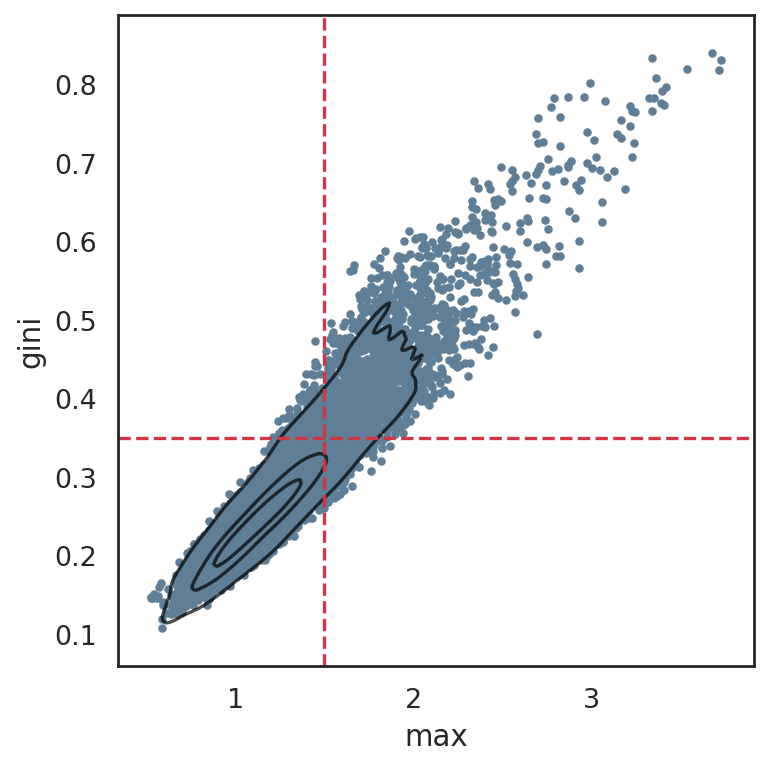

In [13]:
si.pl.entity_metrics(adata_cmp_CG,x='max',y='gini',
                     show_texts=False,
                     show_cutoff=True,
                     show_contour=True,
                     c='#607e95',
                     cutoff_x=1.5,
                     cutoff_y=0.35)

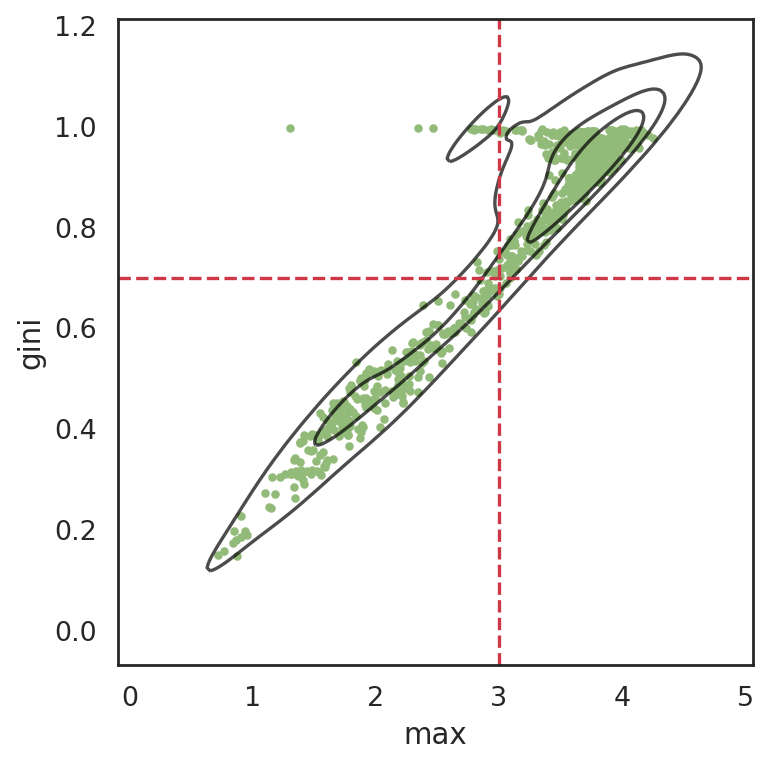

In [14]:
si.pl.entity_metrics(adata_cmp_CM,x='max',y='gini',
                     show_texts=False,
                     show_cutoff=True,
                     show_contour=True,
                     c='#92ba79',
                     cutoff_x=3,
                     cutoff_y=0.7)

identify master regulators

In [15]:
df_MR = si.tl.find_master_regulators(adata_all,
                                     list_tf_motif=list_tf_motif,
                                     list_tf_gene=list_tf_gene,
                                     cutoff_gene_max=1.5,
                                     cutoff_gene_gini=0.35,
                                     cutoff_motif_max=3,
                                     cutoff_motif_gini=0.7,
                                     metrics_gene=df_metrics_gene,
                                     metrics_motif=df_metrics_motif
                                    )

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Adding motif metrics ...
Adding gene metrics ...
Computing distances between TF motifs and genes ...
filtering master regulators based on gene metrics:
Gini index
max
filtering master regulators based on motif metrics:
Gini index
max


In [16]:
df_MR

,motif,gene,rank,dist,max_motif,std_motif,gini_motif,entropy_motif,max_gene,std_gene,gini_gene,entropy_gene
0,M_ENSMUSG00000002983_LINE7015_Relb_I,Relb,6.0,1.841419,4.137951,2.204292,0.958187,5.173000,2.200178,0.819749,0.475906,8.339973
1,M_ENSMUSG00000027985_LINE1723_Lef1_D,Lef1,20.0,1.777754,3.629514,2.863067,0.896504,6.426489,1.555286,0.881973,0.448684,8.439009
2,M_ENSMUSG00000005836_LINE1110_Gata6_D,Gata6,20.0,2.180344,4.005656,3.809256,0.968346,4.878388,2.022788,0.665929,0.412207,8.438866
3,M_ENSMUSG00000025225_LINE1658_Nfkb2_I,Nfkb2,50.0,2.329539,3.904178,1.802294,0.922550,5.768632,1.762300,0.665998,0.375743,8.521793
4,M_ENSMUSG00000033016_LINE1662_Nfatc1_I,Nfatc1,54.0,2.451544,3.552284,2.898845,0.977447,3.644386,1.787450,0.620042,0.365021,8.528356
...,...,...,...,...,...,...,...,...,...,...,...,...
63,M_ENSMUSG00000026077_LINE84_Npas2_D,Npas2,17207.0,4.290294,3.382352,2.224144,0.946492,4.167462,2.068159,0.851327,0.467876,8.372712
64,M_ENSMUSG00000028940_LINE94_Hes2_D,Hes2,17221.0,3.984124,3.309705,1.710030,0.817412,6.702363,1.796419,0.752017,0.428637,8.447193
65,M_ENSMUSG00000042745_LINE133_Id1_I,Id1,17257.0,4.314670,3.443919,2.221636,0.934407,4.687283,1.907240,0.794275,0.432841,8.438908
66,M_ENSMUSG00000038415_LINE1071_Foxq1_I,Foxq1,17321.0,2.686434,3.650490,2.118908,0.890306,6.075940,2.636956,1.002889,0.630324,7.898009


### Identify target genes

In [20]:
adata_CP = si.read_h5ad(os.path.join(workdir,'adata_CP.h5ad'))

adata_PM = si.read_h5ad(os.path.join(workdir,'adata_PM.h5ad'))
#make sure the indices of motifs are the same as in `motifs_genes`
adata_PM.var.index = 'M_' + adata_PM.var.index 

In [21]:
master_regulators = ['Lef1', 'Hoxc13', 'Relb', 'Gata6', 'Nfatc1']
list_tf_motif = motifs_genes[np.isin(motifs_genes['gene'], master_regulators)]['motif'].tolist()
list_tf_gene = motifs_genes[np.isin(motifs_genes['gene'], master_regulators)]['gene'].tolist()

The following step can be ignored if `si.tl.gene_scores(adata_CP)` has been performed before

In [22]:
# get the overlap between peaks and gene loci
# the field `uns['gene_scores']['overlap']` will be added to adata_CP
_ = si.tl.gene_scores(adata_CP,genome='mm10',use_gene_weigt=True,use_top_pcs=False)

Gene scores are being calculated for the first time
`use_precomputed` has been ignored
Processing: 0.0%
Processing: 20.0%
Processing: 40.0%
Processing: 60.0%
Processing: 80.0%


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [23]:
dict_tf_targets = si.tl.find_target_genes(adata_all,
                                          adata_PM,
                                          list_tf_motif=list_tf_motif,
                                          list_tf_gene=list_tf_gene,
                                          adata_CP=adata_CP,
                                          cutoff_gene=5000)

Preprocessing ...


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


#genes: 17399
#peaks: 332987
#genes-associated peaks: 318851
computing distances between genes and genes-associated peaks ...
Saving variables into `.uns['tf_targets']` ...
searching for target genes of M_ENSMUSG00000005836_LINE1110_Gata6_D
#candinate genes is 400
removing duplicate genes ...
removing genes that do not contain TF motif ...
#candinate genes is 213
completed: 0.0%
completed: 19.7%
completed: 39.4%
completed: 59.2%
completed: 78.9%
completed: 98.6%
Pruning candidate genes based on nearby peaks ...
Pruning candidate genes based on average rank ...
searching for target genes of M_ENSMUSG00000033016_LINE1662_Nfatc1_I


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


#candinate genes is 400
removing duplicate genes ...
removing genes that do not contain TF motif ...
#candinate genes is 232
completed: 0.0%
completed: 19.8%
completed: 39.7%
completed: 59.5%
completed: 79.3%
completed: 99.1%
Pruning candidate genes based on nearby peaks ...
Pruning candidate genes based on average rank ...
searching for target genes of M_ENSMUSG00000027985_LINE1723_Lef1_D


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


#candinate genes is 400
removing duplicate genes ...
removing genes that do not contain TF motif ...
#candinate genes is 289
completed: 0.0%
completed: 19.7%
completed: 39.4%
completed: 59.2%
completed: 78.9%
completed: 98.6%
Pruning candidate genes based on nearby peaks ...
Pruning candidate genes based on average rank ...
searching for target genes of M_ENSMUSG00000002983_LINE7015_Relb_I


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


#candinate genes is 400
removing duplicate genes ...
removing genes that do not contain TF motif ...
#candinate genes is 226
completed: 0.0%
completed: 19.9%
completed: 39.8%
completed: 59.7%
completed: 79.6%
completed: 99.6%
Pruning candidate genes based on nearby peaks ...
Pruning candidate genes based on average rank ...
searching for target genes of M_ENSMUSG00000001655_LINE1151_Hoxc13_D


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


#candinate genes is 400
removing duplicate genes ...
removing genes that do not contain TF motif ...
#candinate genes is 259
completed: 0.0%
completed: 19.7%
completed: 39.4%
completed: 59.1%
completed: 78.8%
completed: 98.5%
Pruning candidate genes based on nearby peaks ...
Pruning candidate genes based on average rank ...


In [24]:
dict_tf_targets.keys()

dict_keys(['M_ENSMUSG00000005836_LINE1110_Gata6_D', 'M_ENSMUSG00000033016_LINE1662_Nfatc1_I', 'M_ENSMUSG00000027985_LINE1723_Lef1_D', 'M_ENSMUSG00000002983_LINE7015_Relb_I', 'M_ENSMUSG00000001655_LINE1151_Hoxc13_D'])

In [25]:
dict_tf_targets['M_ENSMUSG00000027985_LINE1723_Lef1_D']

,average_rank,has_motif,rank_gene_to_TFmotif,rank_gene_to_TFgene,rank_peak_to_TFmotif,rank_peak2_to_TFmotif,rank_peak_to_gene,rank_peak2_to_gene
Slc16a6,10.0,yes,2.0,18.0,2364.0,13824.0,917.0,917.0
Lef1,10.5,yes,20.0,1.0,121.0,2150.0,803.0,803.0
Psd3,14.0,yes,26.0,2.0,181.0,3591.0,522.0,522.0
Tle4,17.5,yes,31.0,4.0,2.0,2.0,26.0,26.0
Tiam2,18.0,yes,25.0,11.0,69.0,69.0,654.0,654.0
...,...,...,...,...,...,...,...,...
Cldn10,3857.0,yes,68.0,7646.0,1462.0,121799.0,59.0,59.0
Has3,4011.0,yes,35.0,7987.0,3271.0,26782.0,723.0,723.0
Npas2,4300.0,yes,147.0,8453.0,141.0,220013.0,1301.0,1301.0
Rgs9,4346.5,yes,37.0,8656.0,669.0,27978.0,118.0,118.0


In [26]:
dict_tf_targets['M_ENSMUSG00000001655_LINE1151_Hoxc13_D']

,average_rank,has_motif,rank_gene_to_TFmotif,rank_gene_to_TFgene,rank_peak_to_TFmotif,rank_peak2_to_TFmotif,rank_peak_to_gene,rank_peak2_to_gene
Cybrd1,43.5,yes,66.0,21.0,341.0,341.0,1228.0,1228.0
Tiam2,47.0,yes,87.0,7.0,3496.0,5221.0,654.0,654.0
Sema4c,64.5,yes,35.0,94.0,79.0,72730.0,102.0,102.0
Ammecr1,65.5,yes,57.0,74.0,1777.0,2668.0,760.0,760.0
Pim1,66.0,yes,108.0,24.0,682.0,43191.0,4908.0,4908.0
...,...,...,...,...,...,...,...,...
Dapl1,3125.5,yes,19.0,6232.0,359.0,359.0,227.0,227.0
Vipr1,3335.5,yes,20.0,6651.0,975.0,18759.0,825.0,825.0
Myo5c,3809.5,yes,84.0,7535.0,807.0,807.0,19.0,19.0
Krt81,3872.0,yes,7.0,7737.0,7.0,38.0,3.0,3.0


save results

In [27]:
adata_CP.write(os.path.join(workdir,'adata_CP.h5ad'))

In [28]:
import pickle
with open('./result_multiome_shareseq/dict_tf_targets.pickle', 'wb') as handle:
    pickle.dump(dict_tf_targets, handle, protocol=pickle.HIGHEST_PROTOCOL)

Read back pickle file
```python
with open('./result_multiome_shareseq/dict_tf_targets.pickle', 'rb') as handle:
    dict_tf_targets = pickle.load(handle)
```